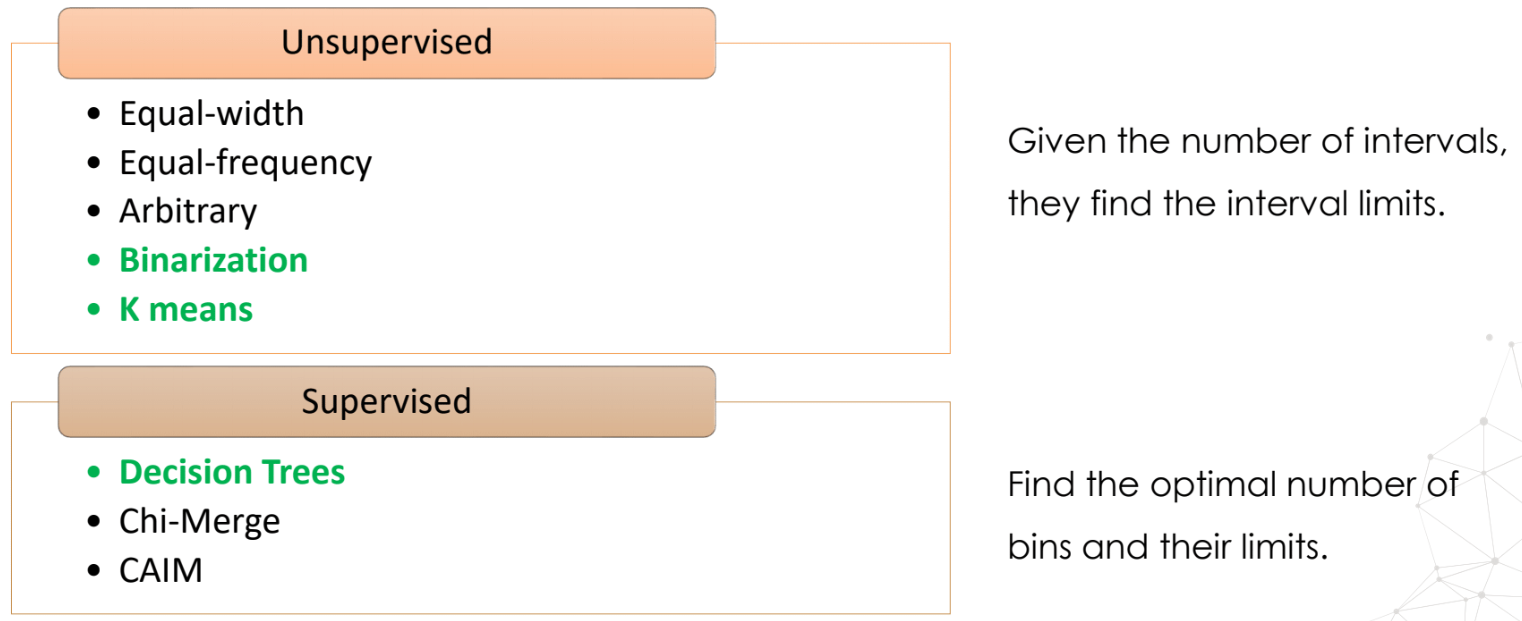

**K-Means Discretization**

* Usage: K-Means discretization uses the k-means clustering algorithm to group continuous data into distinct bins based on similarity. It attempts to minimize the variance within bins.
* Key Assumption: The data naturally forms clusters, and the optimal bin boundaries are found by partitioning the data around centroids.
* Common Use Case: Applied when there’s a need to discover natural groupings in the data without a fixed pattern.

**Decision Trees for Discretization**
* Usage: Decision trees are used to create bins by finding the optimal split points based on a target variable, aiming to maximize predictive performance.
* Key Assumption: The relationship between the continuous variable and the target is non-linear, and decision trees can capture this relationship well.
* Common Use Case: Typically used in supervised discretization to maximize classification or regression accuracy by splitting continuous variables at optimal points.

**Binarization**
* Usage: Binarization converts continuous or discrete data into binary values (0s and 1s), based on a threshold. Values above the threshold are converted to 1, and values below are set to 0.
* Key Assumption: The data can be effectively separated into two distinct categories based on a meaningful threshold.
* Common Use Case: Commonly used in feature engineering when dealing with binary classification problems or to transform continuous features into binary features for simpler models.

# Discretization with k-means clustering

This discretization method consists of applying k-means clustering to the continuous variable.

Briefly, the algorithm works as follows:

* Initialization: random creation of K centers
* Each data point is associated with the closest center
* Each center position is re-computed as the center of its associated points

## Discretization with k-means using Sklearn



In [ ]:
# Step 1: Import the KBinsDiscretizer class from scikit-learn
from sklearn.preprocessing import KBinsDiscretizer

# Step 2: Initialize the KBinsDiscretizer with specific parameters
disc = KBinsDiscretizer(
    n_bins=4,              # Number of bins to divide each feature into
    encode='ordinal',      # Encode the bins as ordinal numbers (0, 1, 2, 3)
    strategy='kmeans',     # Use the k-means clustering algorithm to define bin edges
    subsample=None         # Use the entire dataset without subsampling
)

# Step 3: Set the output format to be a pandas DataFrame
disc.set_output(transform="pandas")

# Step 4: Fit the discretizer to the 'age' and 'fare' columns in the training data
disc.fit(X_train[['age', 'fare']])

# Step 5: Retrieve the bin edges (boundaries) learned during the fit process
disc.bin_edges_

# Step 6: Apply the discretization transformation to the training data
train_t = disc.transform(X_train[['age', 'fare']])

# Step 7: Apply the same transformation to the test data
test_t = disc.transform(X_test[['age', 'fare']])

# Step 8: Display the first few rows of the transformed training data
train_t.head()

### Visualize results

In [ ]:
# Step 1: Group and calculate the proportion of observations in each 'age' bin for the training data
t1 = train_t.groupby(['age'])['age'].count() / len(train_t)

# Step 2: Group and calculate the proportion of observations in each 'age' bin for the test data
t2 = test_t.groupby(['age'])['age'].count() / len(test_t)

# Step 3: Concatenate the training and test proportions into a single DataFrame
tmp = pd.concat([t1, t2], axis=1)

# Step 4: Rename the columns for clarity ('train' and 'test')
tmp.columns = ['train', 'test']

# Step 5: Create a bar plot to compare the distribution of 'age' bins between train and test sets
tmp.plot.bar()

# Step 6: Set the x-axis labels to have no rotation (make the labels horizontal)
plt.xticks(rotation=0)

# Step 7: Add a label to the y-axis
plt.ylabel('Number of observations per bin')

# Discretization with Decision Trees


Discretization with decision trees consists of using a decision tree to identify the optimal bins. When a decision tree makes a decision, it assigns an observation to one of its end leaves. Therefore, any decision tree will generate a discrete output, whose values are the predictions at each of its n leaves.

How to do discretization with trees?

Train a decision tree of limited depth (2, 3  or 4) using the variable we want to discretize and the target.
Replace the values by the output returned by the tree.

**Advantages**
* The output returned by the decision tree is monotonically related to the target.
* The tree end nodes, or bins, in the discretized variable show decreased entropy, that is, the observations within each bin are more similar among themselves than to those of other bins.

**Limitations**
* Prone over-fitting
* More importantly, some tuning of the tree parameters is needed to obtain the optimal number of splits (e.g., tree depth, minimum number of samples in one partition, maximum number of partitions, and a minimum information gain). This it can be time consuming.

# Discretization with Decision Trees using Feature-Engine


In [ ]:
# Step 1: Initialize the DecisionTreeDiscretiser with cross-validation, scoring method, variables to discretize, and parameter grid.
# This sets up the DecisionTreeDiscretiser to optimize the binning based on a decision tree's learned splits.
treeDisc = DecisionTreeDiscretiser(
    cv=10,  # Perform 10-fold cross-validation
    scoring='accuracy',  # Evaluate the model using accuracy as a scoring metric
    variables=['age', 'fare'],  # Variables to discretize
    regression=False,  # This is a classification problem
    param_grid={'max_depth': [1, 2, 3], 'min_samples_leaf': [10, 4]}  # Hyperparameters for the decision tree
)

# Step 2: Fit the DecisionTreeDiscretiser to the training data and the target.
# The model fits a decision tree to the specified variables to learn the optimal splits for each feature.
treeDisc.fit(X_train, y_train)

# Step 3: Inspect the best parameters for the 'age' variable after fitting the tree.
# Access the best parameters for 'age' based on the decision tree fitting process.
treeDisc.binner_dict_['age'].best_params_

# Step 4: Check the performance of the tree for 'age' on the training set.
# Displays the accuracy score of the decision tree model for the 'age' variable.
treeDisc.scores_dict_['age']

# Step 5: Inspect the best parameters for the 'fare' variable.
# Access the best hyperparameters for 'fare' after fitting the decision tree.
treeDisc.binner_dict_['fare'].best_params_

# Step 6: Check the performance of the tree for 'fare' on the training set.
# Displays the accuracy score of the decision tree model for the 'fare' variable.
treeDisc.scores_dict_['fare']

# Step 7: Transform the training and test data using the fitted discretiser.
# Discretizes the 'age' and 'fare' variables in both the training and test data using the learned splits.
train_t = treeDisc.transform(X_train)
test_t = treeDisc.transform(X_test)

# Step 8: Inspect the unique bins created for the 'age' variable.
# Displays the unique bin values that were created for the 'age' variable after discretization.
train_t['age'].unique()

# Step 9: Plot the relationship between the discretized 'age' bins and the mean of the target variable (Survived).
# Creates a plot to check the monotonic relationship between discretized 'age' bins and the survival rate.
y_test.groupby(test_t['age']).mean().plot()
plt.title('Monotonic relationship between discretised Age and target')
plt.ylabel('Survived')

By comparing the accuracy of the decision trees for age and fare, we can derive that fare is a better indicator of the outcome survived.

### Visualizing results for monotonic relatioships

In [ ]:
# Step 10: Visualizeresults for monotonic relationships
y_test.groupby(test_t['age']).mean().plot()
plt.title('Monotonic relationship between discretised Age and target')
plt.ylabel('Survived')

y_test.groupby(test_t['fare']).mean().plot()
plt.title('Monotonic relationship between discretised Age and target')
plt.ylabel('Survived')

### Visualizing results for how many observations we have per bin

In [ ]:
# Step 11: Visualizing results for how many observations we have per bin
t1 = train_t.groupby(['age'])['age'].count() / len(train_t)
t2 = test_t.groupby(['age'])['age'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)

# Binarization

**Definition**

Binarization consists in transforming numerical features into a
binary variable.
* Values above a certain threshold are mapped to 1, and
* values below the threshold are mapped to 0
* Commonly used with sparse data (most values are 0).
* Data generated from text, like bags of words.
* Variables where the great majority of the values are 0.

**Additional reference**

* [Binarization](https://www.dropbox.com/scl/fo/le47x1fez8y7g7akw9bo9/AESHuZqJLxbiyMLA6wtwuZk/Section-13-Discretisation-Alternative?dl=0&e=2&preview=04-Binarization.pdf&rlkey=7257ih8lct4v0nkroy7if74i1)

## Binarization with Sklearn

In [ ]:
from sklearn.preprocessing import Binarizer

# Step 1: Import Binarizer from sklearn.preprocessing and set up a Binarizer
# Initializes the Binarizer to transform the data based on a threshold value of 0.
binarizer = Binarizer(threshold=0).set_output(transform="pandas")

# Step 2: Fit the Binarizer to the data and transform it
# Applies the Binarizer to the data, transforming all values into binary (0 or 1) based on the threshold.
data_t = binarizer.fit_transform(data)

# Step 3: Describe the transformed data
# Provides summary statistics of the transformed data to show how the binarization affected the distribution.
data_t.describe()

### Visualizing results

In [ ]:
# Step 1: Plot histograms of the transformed data
# Visualizes the distribution of the binarized data across all columns to observe the frequency of 0s and 1s.
data_t.hist(figsize=(20, 20), layout=(3, 4))
plt.show()

In [ ]:
# Step 1: Prepare to plot the binarized variables
# Create a figure for plotting multiple variables' binarized distributions.
plt.figure(figsize=(20, 20), constrained_layout=True)

# Step 2: Loop through the first 10 variables
# Iterate over the first 10 variables from the binarized dataset to create bar plots.
for i in range(10):

    # Step 3: Set subplot location
    # Define the subplot position in the grid layout for each variable.
    ax = plt.subplot(3, 4, i + 1)

    # Step 4: Select variable to plot
    # Get the name of the current variable being plotted.
    var = variables[i]

    # Step 5: Determine proportion of observations per bin
    # Calculate the relative frequency of 0s and 1s in the binarized variable.
    t = data_t[var].value_counts(normalize=True)

    # Step 6: Plot bar chart for the binarized variable
    # Plot the distribution of 0s and 1s for the variable.
    t.plot.bar(ax=ax)

    # Step 7: Set labels and title
    # Add labels for x-ticks and y-axis, and set the title of the subplot to the variable name.
    plt.xticks(rotation=0)
    plt.ylabel("Observations per bin")
    ax.set_title(var)

# Step 8: Show the plot
# Display the combined plot with bar charts for all 10 variables.
plt.show()